In [3]:
import numpy as np
import matplotlib.pyplot as plt

from lattice488 import Code488 
import time

import pickle
import os.path
import warnings
warnings.filterwarnings('ignore')
from batchFunctions import Batch

In [5]:

def getData(batch, anyError = True, index = 0):
    '''
    Gets the data from the batch in array format
    '''
    x = np.zeros(len(batch.Pdata))
    y = np.zeros(len(batch.Pdata))
    e = np.zeros(len(batch.Pdata))
    s = np.zeros(len(batch.Pdata))
    i=0
    for p in batch.Pdata:

        samples = batch.Pdata[p].samples
        
        if anyError:
            pl = batch.Pdata[p].anyError
        else:
            pl = batch.Pdata[p].eachError[index]
        #print(p,pl/samples,samples )
        x[i] = p
        y[i] = 1.0 * pl/samples
        e[i] = np.sqrt(y[i]*(1-y[i])/samples)
        s[i] = samples
        i+=1

    return x,y,e,s



In [6]:
def plotCompiledData(batches,index=0,allsamples = False):

    for batch in batches:
        batch.load()
    plt.figure(figsize=(6,4))

    nqubits = ["72","648","5832","52488"]
    colors = ['blue','orange','green', 'red']
    X = []
    Y = []
    E = []

    for i in range(len(batches)):   
        m = i+1
        batch = batches[i]

        x,y,e,s = getData(batch,True,index)
        X.append(x)
        Y.append(y)
        E.append(e)
        plt.errorbar(x,y,yerr=e,linestyle="",marker ='o',
                     label = "N = "+nqubits[i], color = colors[i])
        idx = np.argsort(x)
        x = np.array(x)[idx]
        y = np.array(y)[idx]
        plt.plot(x,y,color = colors[i], alpha = 0.35)
        print("Samples m=",m,", average: ",np.mean(s), ", min: ", np.min(s))
        if allsamples:

            print("Samples m=",m,", ",s)
    #plt.yscale('log')
    plt.legend()
    plt.title("Logical error rate in the 488 rescaling decoder")
    plt.xlabel("Physical error rate")
    plt.ylabel("Logical error rate")
    return X,Y,E

In [7]:
def plotCompiledData(batches,index=0,allsamples = False):

    for batch in batches:
        batch.load()
    plt.figure(figsize=(12,4))

    nqubits = ["72","648","5832","52488"]
    colors = ['blue','orange','green', 'red']
    X = []
    Y = []
    E = []
    plt.subplot(121)
    for i in range(len(batches)):   
        m = i+1
        batch = batches[i]

        x,y,e,s = getData(batch,True,index)
        X.append(x)
        Y.append(y)
        E.append(e)
        plt.errorbar(x,y,yerr=e,linestyle="",marker ='o',
                     label = "N = "+nqubits[i], color = colors[i])
        idx = np.argsort(x)
        x = np.array(x)[idx]
        y = np.array(y)[idx]
        plt.plot(x,y,color = colors[i], alpha = 0.35)
        print("Samples m=",m,", average: ",np.mean(s), ", min: ", np.min(s))
        if allsamples:

            print("Samples m=",m,", ",s)
    #plt.yscale('log')
    plt.legend()
    plt.title("Any logical error rate in the 488 rescaling decoder")
    plt.xlabel("Physical error rate")
    plt.ylabel("Logical error rate")
    
    
    
    ###### plt.figure(figsize=(6,4))

    # average for all logical errors

    nqubits = ["72","648","5832","52488"]
    colors = ['blue','orange','green', 'red']
    plt.subplot(122)
    for i in range(len(batches)):   
        m = i+1
        batch = batches[i]

        x,y,e,s = getData(batch,False,0)
        x*=0
        y*=0
        e*=0
        for k in range(4):
            xi,yi,ei,s = getData(batch,False,k)
            x+=xi
            y+=yi
            e+=ei
        x/=4
        y/=4
        e/=4


        plt.errorbar(x,y,yerr=e,linestyle="",marker ='o',
                     label = "N = "+nqubits[i], color = colors[i])
        idx = np.argsort(x)
        x = np.array(x)[idx]
        y = np.array(y)[idx]
        plt.plot(x,y,color = colors[i], alpha = 0.35)


    plt.plot(x,x, '--',color = 'k', alpha = 0.5, label = r'$p_{q} = p_{L}$')


    #plt.yscale('log')

    plt.legend()
    plt.title("Average Logical error rate in the 488 rescaling decoder")
    plt.xlabel("Physical error rate")
    plt.ylabel("Logical error rate")

    
    return X,Y,E

# Results from the simulations of the 488 rescaling decoder



In [7]:

'''
##########################################################################################
    Details for the Last set
'''
batches= []
bind="1"
maxm=5
for m in range(maxm):
    batch = Batch(name=bind+'thBatchData/compiled'+bind+"thBatchm"+str(m+1),
              m=m+1,
              shortcuts=True,
              cornerUpdates=True,
              nsteps=0,
              nmean=7,
              BPsteps=3,
              hardRescale=False,
              hardSplits=False,
              renormalizeOn=False,
              tolerance=1e-25,
              qubitTolerance=1e-25,
              splitCutoff=1e-25,
              useposterior=False)
    batches.append(batch)

print("Data from the "+bind+"th batches")

Data from the 35th batches


In [9]:

def loadAllData(thisbatch):
    print("Initiating loading for ",thisbatch.name)
    directory = 'data/'
    for filename in os.listdir(directory):
        #print("   Loading data from file: ", filename)
        if filename[7:9]=="m"+str(thisbatch.m):
            thisbatch.load(filename)
            #print("   Loading data from file: ", filename)

for batch in batches:
    loadAllData(batch) 

Initiating loading for  35thBatchData/compiled35thBatchm1
Initiating loading for  35thBatchData/compiled35thBatchm2
Initiating loading for  35thBatchData/compiled35thBatchm3
Initiating loading for  35thBatchData/compiled35thBatchm4
Initiating loading for  35thBatchData/compiled35thBatchm5


In [10]:
# once we have all data compiled, we can save it in the compiled 
# version and delete the rest of data files
for batch in batches:
    #batch.load()
    batch.save()
    


Samples m= 1 , average:  603900.0 , min:  600600.0 , max:  607700.0
Samples m= 2 , average:  91009.16666666667 , min:  90180.0 , max:  91775.0
Samples m= 3 , average:  16587.25 , min:  16385.0 , max:  16731.0
Samples m= 4 , average:  5484.933333333333 , min:  1429.0 , max:  7825.0
Samples m= 5 , average:  5636.25 , min:  2223.0 , max:  9084.0


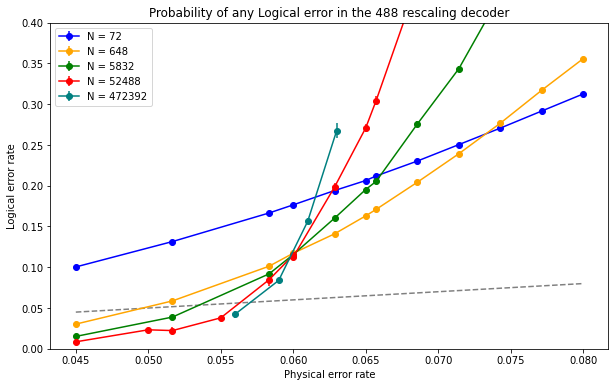

In [15]:


def getData(batch, anyError = True, index = 0):
    '''
    Gets the data from the batch in array format
    '''
    x = np.zeros(len(batch.Pdata))
    y = np.zeros(len(batch.Pdata))
    e = np.zeros(len(batch.Pdata))
    s = np.zeros(len(batch.Pdata))
    i=0
    for p in batch.Pdata:

        samples = batch.Pdata[p].samples
        
        if anyError:
            pl = batch.Pdata[p].anyError
        else:
            pl = batch.Pdata[p].eachError[index]
        #print(p,pl/samples,samples )
        x[i] = p
        y[i] = 1.0 * pl/samples
        e[i] = np.sqrt(y[i]*(1-y[i])/samples)
        s[i] = samples
        i+=1 
    idx = np.argsort(x)
    x = np.array(x)[idx]
    y = np.array(y)[idx]
    e = np.array(e)[idx]
    s = np.array(s)[idx]

    return x,y,e,s

plt.figure(figsize=(10,6))

nqubits = ["72","648","5832","52488","472392"]
colors = ['blue','orange','green', 'red','teal']

for i in range(len(batches)):   
#for i in range(3):   
    m = i+1
    batch = batches[i]
    
    x,y,e,s = getData(batch) 
    plt.errorbar(x,y,yerr=e,linestyle="-",marker ='o',
                 label = "N = "+nqubits[i], color = colors[i])
    print("Samples m=",m,", average: ",np.mean(s), ", min: ", np.min(s), ", max: ", np.max(s))

#dx = x[1]-x[0]
#plt.xlim(x[0]-dx,x[-1]+dx)
#plt.plot(x,x, '--',color = 'k', alpha = 0.5)

plt.legend()
plt.title("Probability of any Logical error in the 488 rescaling decoder")
plt.xlabel("Physical error rate")
plt.ylabel("Logical error rate")
#plt.yscale("log")
#plt.xscale("log")
plt.ylim(0,0.4)
xp = np.linspace(0.045,0.08,100)
plt.plot(xp,xp,'--',color = 'grey')

m  1 , threshold  0.0642 ± 0.0005
m  2 , threshold  0.0688 ± 0.0004
m  3 , threshold  0.0646 ± 0.0007
m  4 , threshold  0.0623 ± 0.0006
m  5 , threshold  0.0613 ± 0.0003
[0.06422718604827332, 0.06876557822754283, 0.06456765234091477, 0.06231828067748493, 0.061335261877811104]


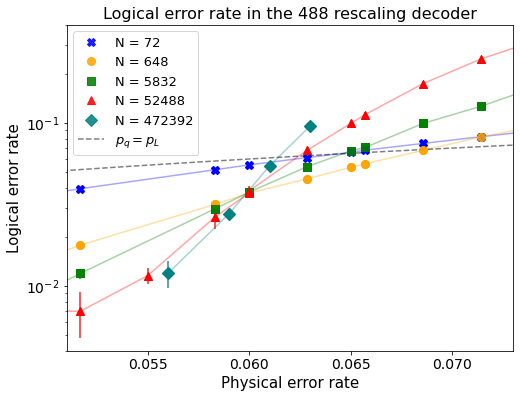

In [12]:
plt.figure(figsize=(8,6))
from matplotlib.patches import Rectangle
# average for all logical errors

from matplotlib.collections import PatchCollection


nqubits = ["72","648","5832","52488","472392"]
colors = ['blue','orange','green', 'red','teal']
markers = ["X","o","s","^","D"]
thresholds = []
errors = []

pm = []
plogm = []
errm=[]

for i in range(len(batches)):   
    m = i+1
    batch = batches[i]

    x,y,e,s = getData(batch,False,0)
    x*=0
    y*=0
    e*=0
    for k in range(4):
        xi,yi,ei,s = getData(batch,False,k)
        x+=xi
        y+=yi
        e+=ei
    x/=4
    y/=4
    e/=4
    
    pm.append(x)
    plogm.append(y)
    errm.append(e)
    #plt.errorbar(x,y,yerr=e,linestyle="",marker =markers[i],
    #             label = "N = "+nqubits[i], color = colors[i], alpha = 0.87, markersize =8)
    
    plt.errorbar(x,y,yerr=e,linestyle="",marker =markers[i],
                   color = colors[i], alpha = 0.87, markersize =8)
    plt.plot(x,y, linestyle="",marker =markers[i],
                 label = "N = "+nqubits[i], color = colors[i], alpha = 0.87, markersize =8)
    idx = np.argsort(x)
    x = np.array(x)[idx]
    y = np.array(y)[idx]
    plt.plot(x,y,color = colors[i], alpha = 0.35)
    
    
    yp = y - x
    xt = -1
    for k in range(len(y)):
        if yp[k]>0 and xt<0:
            x0 = x[k-1]
            y0 = yp[k-1]
            x1 = x[k]
            y1 = yp[k]
            xt = x0 - y0 * (x1-x0)/(y1-y0)
            
            e0 = e[k-1]
            e1 = e[k]
            
            y0+=e0
            y1+=e1
            xtu = x0 - y0 * (x1-x0)/(y1-y0)
            y0-= 2*e0
            y1-= 2*e1
            xtd = x0 - y0 * (x1-x0)/(y1-y0)
            et = xtu-xtd
            
            errors.append(et)
            
            
    ndigits = 4
    print("m ", m, ", threshold ", np.round(xt,ndigits), "±", np.round(-et,ndigits))
    thresholds.append(xt)
    #plt.plot([xt,xt],[0,1],color = colors[i],alpha = 0.1)
    #plt.plot([xtu,xtu],[0,1],color = colors[i],alpha = 0.1)
    #plt.plot([xtd,xtd],[0,1],color = colors[i],alpha = 0.1)
    #plt.plot([xt+et,xt+et],[0,1],color = colors[i],alpha = 0.1)
    #plt.plot([xt-et,xt-et],[0,1],color = colors[i],alpha = 0.1)
    #Rectangle(xy, width, height, angle=0.0)
    #Rectangle((xt+et,0), width= 2*et, height = 1, angle=0.0,color = colors[i])


#dx = x[1]-x[0]
#plt.xlim(0.045,.115)
x= np.linspace(0.045,0.08,100)
plt.plot(x,x, '--',color = 'k', alpha = 0.5, label = r'$p_{q} = p_{L}$')


#plt.yscale('log')

plt.legend(fontsize = 13)
plt.title("Logical error rate in the 488 rescaling decoder", fontsize = 16)
plt.xlabel("Physical error rate", fontsize = 15)
plt.ylabel("Logical error rate",fontsize = 15)
plt.xticks(fontsize=14)#, rotation=90)
plt.yticks(fontsize=14)#, rotation=90)
plt.locator_params(axis="x", nbins=8)


a,b = .061,.062
#plt.xlim(a,b)
#plt.ylim(0.005,0.14)
#plt.ylim(a,b)
plt.ylim(0.004,0.4)
plt.xlim(0.051,0.073)
plt.yscale("log")
print(thresholds)
plt.savefig("thresholdDataLog.pdf")


In [64]:
def round_to_1(x):
    return np.round(x, -int(np.floor(np.log10(abs(x)))))

In [70]:
def roundp(p,e):
    i = - int(np.floor(np.log10(abs(e))))
    return np.round(p,i), np.round(e,i)

In [74]:
for m in range(len(pm)-1):
    print("m = ", m+1)
    print("p,      plog")
    #for i in range(len(pm[m])):
    for i in [0,5,8]:
        #print(np.round(pm[m][i],4), round_to_1(plogm[m][i]), round_to_1(errm[m][i]))
        #print(np.round(pm[m][i],4), roundp(plogm[m][i], errm[m][i]))
        a = np.round(pm[m][i],4)
        b,c  = roundp(plogm[m][i], errm[m][i])
        print(a , " & $", b, "\pm ", c , "$ \\\\")


m =  1
p,      plog
0.045  & $ 0.0293 \pm  0.0002 $ \\
0.065  & $ 0.0659 \pm  0.0003 $ \\
0.0714  & $ 0.0822 \pm  0.0004 $ \\
m =  2
p,      plog
0.045  & $ 0.0088 \pm  0.0003 $ \\
0.065  & $ 0.0533 \pm  0.0007 $ \\
0.0714  & $ 0.082 \pm  0.0009 $ \\
m =  3
p,      plog
0.045  & $ 0.0045 \pm  0.0005 $ \\
0.065  & $ 0.067 \pm  0.002 $ \\
0.0714  & $ 0.126 \pm  0.003 $ \\
m =  4
p,      plog
0.045  & $ 0.003 \pm  0.001 $ \\
0.06  & $ 0.037 \pm  0.002 $ \\
0.065  & $ 0.099 \pm  0.003 $ \\


[0.05186007 0.62278107 0.06020205]
slope:  0.051860067413526965
nu =  1.6057006897823636
pseudothreshold:  0.06020204668877289


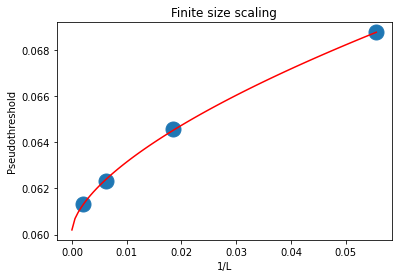

In [22]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * x**b + c
L = np.array([6,18,54,162,486])

xdata = 1/L[1:]
ydata = y[1:]


plt.plot(xdata, ydata, '.', label='data', markersize = 30)
#Fit for the parameters a, b, c of the function func:

popt, pcov = curve_fit(func, xdata, ydata)
print(popt)
a,b,c = popt
xplot = np.linspace(0,xdata[0],100)
plt.plot(xplot, func(xplot, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel("1/L")
plt.ylabel("Pseudothreshold")
plt.title("Finite size scaling")
print("slope: ",a)
print("nu = ",1/b)
print("pseudothreshold: ",c)

Fitting the pseudothresholds $y$ to 
$$y = a x^b + c$$
with $x = 1/L$, $b = 1/\nu$ and $c$ being the threshold 

In [23]:
nqubits = ["72","648","5832","52488","472392"]

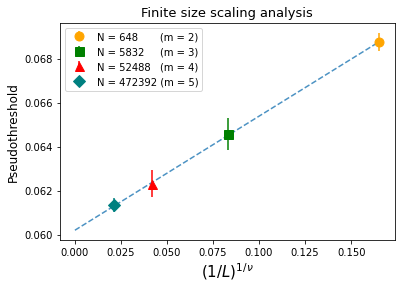

In [24]:
#plt.plot(xdata**(b),ydata,'.', label='data', markersize = 30)
markers = ["o","s","^","D"]
for i in range(len(xdata)):
        plt.errorbar(xdata[i]**b,ydata[i],errors[1:][i],marker = markers[i],linestyle = "", color = colors[i+1],
                label = "N = "+str(nqubits[i+1])+" "*(3-i)*2 +" (m = "+str(i+2)+")", markersize = 9)


a,b,c = popt
xplot = np.linspace(0,xdata[0],100)**(b)
yplot = a * xplot + c
plt.plot(xplot,yplot, '--',alpha = 0.8)

plt.xlabel(r'$(1/L)^{1/\nu}$', fontsize = 15) 
plt.ylabel("Pseudothreshold", fontsize = 12)
plt.legend()
plt.title("Finite size scaling analysis",
         fontsize = 13)

plt.savefig("thresholdLimit.pdf")